In [17]:
from langgraph.graph import StateGraph, START , END 
from typing import TypedDict

In [18]:
class BMIState(TypedDict) : 

    weight_kg : float 
    height_m : float 
    bmi : float 
    health : str


In [19]:
def bmi_value(state: BMIState) -> BMIState :
    weight = state['weight_kg']
    height = state['height_m']
    bmi_value = weight / (height**2)
    state['bmi'] = bmi_value 

    return state


In [20]:
def classify_bmi(state : BMIState) -> BMIState:
    if state['bmi'] < 18.5:
        health = "Underweight"
    elif 18.5 <= state['bmi'] < 25:
        health = "Normal weight"
    elif 25 <= state['bmi'] < 30:
        health = "Overweight"
    elif 30 <= state['bmi'] < 35:
         health = "Obesity Class I (Moderate)"
    elif 35 <= state['bmi'] < 40:
         health = "Obesity Class II (Severe)"
    else:
         health = "Obesity Class III (Very Severe)" 
    state["health"] = health 
    return state

In [21]:
graph = StateGraph(BMIState) 
graph.add_node('bmi',bmi_value)
graph.add_node('health',classify_bmi)
graph.add_edge(START,'bmi')
graph.add_edge('bmi','health')
graph.add_edge('health',END)


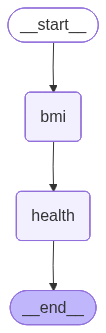

In [22]:
graph.compile()



In [23]:
workflow = graph.compile()

In [30]:
intial_state = {'weight_kg': 85 , "height_m":2.0}

In [31]:
bmi = workflow.invoke(intial_state)
print(bmi)

{'weight_kg': 85, 'height_m': 2.0, 'bmi': 21.25, 'health': 'Normal weight'}


In [34]:
pip install -U langchain-google-genai

  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached proto_plus-1.26.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached pyasn1_modules-0.4.2-py3-none-any.whl.metadata (3.5 kB)
  Using cached rsa-4.9.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached pyasn1-0.6.1-py3-none-any.whl.metadata (8.4 kB)
Using cached filetype-1.2.0-py2.py3-none-any.whl (19 kB)
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 10.4 MB/s  0:00:00
   ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
   ------------------------ --------------- 2.9/4.7 MB 15.3 MB/s eta 0:00:01
   ------------------------------------- -- 4.5/4.7 MB 14.2 MB/s eta 0:00:01
   ---------------------------------------- 4.7/4.7 MB 10.2 MB/s  0:00:00
Using cached proto_plus-1.26.1-py3-none-any.whl (50 kB)
Using cached rsa-4.9.1-py3-none-any.whl (34 kB)
Using cached pyasn1-0.6.1-py3-none-any.whl (83 kB)
Using cached pyas

In [35]:
from dotenv import load_dotenv 
load_dotenv()

True

In [39]:
import os 
os.environ['GOOGLE_API_KEY'] = os.getenv('gemini_api_key')

In [41]:
class llmstate(TypedDict):
    input : str
    answer : str

In [42]:
def llm_response(state: llmstate) -> llmstate:
    from langchain_google_genai import ChatGoogleGenerativeAI
    title = state['input'] 
    prompt = f'Generate a blog for the topic given {title}' 
    llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")
    response = llm.invoke(prompt)
    state['answer'] =response.content 
    return state

In [43]:
graph1 = StateGraph(llmstate)

In [44]:
graph1.add_node('llm_model',llm_response) 

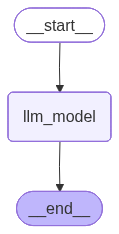

In [45]:
graph1.add_edge(START,'llm_model')
graph1.add_edge('llm_model',END)
graph1.compile()

In [47]:
workflow1 = graph1.compile()


In [49]:
answer = workflow1.invoke({"input" : "Agentic AI"}) 
print(answer['answer'])

## The AI That Acts: Unpacking Agentic AI and the Dawn of Autonomous Intelligence

For years, our interaction with Artificial Intelligence has largely been a call-and-response affair. We ask a question, it provides an answer. We give a command, it executes a specific task. Think chatbots, image generators, or even smart home assistants – powerful, yes, but fundamentally reactive.

But what if AI didn't just *respond*? What if it could anticipate, plan, execute multi-step processes, and even adapt on its own to achieve a complex goal? Welcome to the era of **Agentic AI**.

### Beyond Reactive: What is Agentic AI?

At its core, Agentic AI refers to AI systems designed to be **proactive, goal-oriented, and autonomous**. Unlike traditional AI that waits for explicit instructions at each step, an agentic AI is given a high-level objective and then takes the initiative to break down that objective into sub-tasks, plan a sequence of actions, execute them, monitor its progress, and even self-c

In [40]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage

llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

# Simple text invocation
result = llm.invoke("Sing a ballad of LangChain.")
print(result.content)

# Multimodal invocation with gemini-pro-vision
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image?",
        },
        {"type": "image_url", "image_url": "https://picsum.photos/seed/picsum/200/300"},
    ]
)
result = llm.invoke([message])
print(result.content)

(Verse 1)
In digital realms, where models grand,
With knowledge vast and deep,
Lay scattered tools across the land,
That made the builders weep.
To weave a chain of thought so bright,
And give AI its voice,
Required a complex, arduous fight,
A challenging, hard choice.

(Verse 2)
Then from the code, a name arose,
A promise, clear and bold,
To tame the chaos, ease the woes,
A story to unfold.
LangChain, they called it, strong and true,
A framework, keen and bright,
To bring coherence, fresh and new,
And banish coding's plight.

(Verse 3)
It spoke to models, far and near,
With prompts so sharp and fine,
Dispelling doubt, removing fear,
A templating divine.
For questions asked, and answers sought,
In language pure and plain,
The perfect phrasing it had brought,
To guide the LLM's reign.

(Verse 4)
No single step, a journey long,
But links in sequence strong,
A chain of thought, a coded song,
Where each step played along.
From parsing input, clean and neat,
To calling APIs with grace,
A wo